In [55]:
#Date: 24th August 2018
#Author: Abhijit Jaiswal

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [277]:
path = "/Users/abhijitj/real_estate/"
area_units = os.path.join(path, "area_units.csv")

In [278]:
au = pd.read_csv(area_units, sep=",", header=0)

In [279]:
au.columns

Index(['Region', 'BHK', 'Price', 'Title', 'SQFT', 'Rate', 'Link', 'Bathrooms',
       'Type', 'Possession'],
      dtype='object')

In [280]:
len(au.loc[:,'Region'])

32255

In [281]:
np.unique(au[["BHK"]].values)

array([1, 2, 3])

In [282]:
price = au[au[["Price"]].values != "nan"]["Price"]

In [283]:
au["BHK"].dtype

dtype('int64')

In [284]:
count=0
finprice = []
for idx in range(0, len(price)):
    if "L" in price[idx]:
        temp = price[idx].split("L")[0]
    else:
        if "Cr" in price[idx]:
            temp = float(price[idx].split("Cr")[0])*100
    #print(i, temp)
    finprice.append(round(float(temp), 2))
    count = count + 1
    if count > 1000:
        #print(count)
        count=0

In [285]:
len(finprice)

32255

In [286]:
del au["Price"]

In [287]:
au=au.assign(Price=finprice)

In [288]:
au.columns

Index(['Region', 'BHK', 'Title', 'SQFT', 'Rate', 'Link', 'Bathrooms', 'Type',
       'Possession', 'Price'],
      dtype='object')

In [289]:
wf_1bhk = list(au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["Price"])

In [339]:
wf_1bhk_rate = list(au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["Rate"])
rate_1bhk = list(au[(au["BHK"] == 1)]["Rate"])
rate_2bhk = list(au[(au["BHK"] == 2)]["Rate"])
rate_3bhk = list(au[(au["BHK"] == 3)]["Rate"])
wf_1bhk_sqft = list(au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["SQFT"])

Text(0,0.5,'Price')

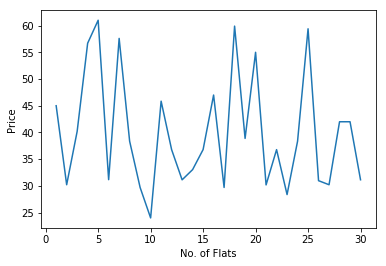

In [291]:
plt.plot(range(1, len(wf_1bhk)+1), wf_1bhk, label="Price")
#plt.plot(range(1, len(wf_1bhk_rate)+1), wf_1bhk_rate, "r", label="Rate")
plt.xlabel("No. of Flats")
plt.ylabel("Price")

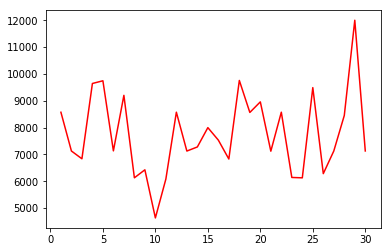

In [292]:
plt.plot(range(1, len(wf_1bhk_rate)+1), wf_1bhk_rate, "r", label="Rate")

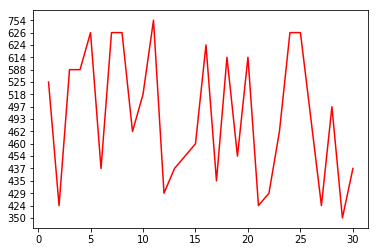

In [293]:
plt.plot(range(1, len(wf_1bhk_sqft)+1), wf_1bhk_sqft, "r", label="SQFT")

In [294]:
au["BHK"].dtype

dtype('int64')

In [295]:
wf_1bhk_sqft_mean = au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["SQFT"].astype(int).values.mean()

In [296]:
au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["SQFT"].astype(int).values.std()

94.75852937276353

In [297]:
from datetime import datetime
ts = []
for i in range(0, len(au)):
    #print(au["Possession"][i])
    if pd.isna(au["Possession"][i]) == False:
        ts.append(datetime.strptime(" ".join([au["Possession"][i].split("'")[0], 
                                          str(int(au["Possession"][i].split("'")[1])+2000)]), "%b %Y"))

In [298]:
int(au["Possession"][0].split("'")[1])+2000

2018

In [341]:
rate_1bhk_clean = au[(au["BHK"] == 1)][(pd.notna(rate_1bhk))]["Rate"]
rate_2bhk_clean = au[(au["BHK"] == 2)][(pd.notna(rate_2bhk))]["Rate"]
rate_3bhk_clean = au[(au["BHK"] == 3)][(pd.notna(rate_3bhk))]["Rate"]

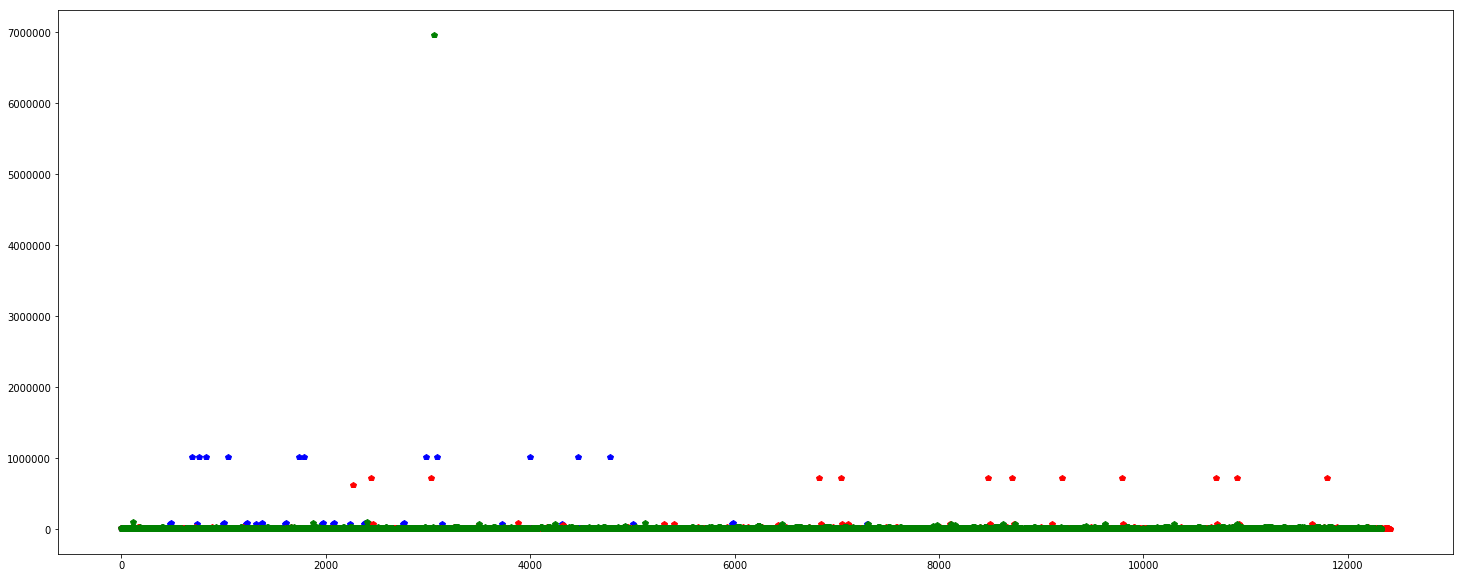

In [346]:
plt.figure(figsize=(25, 10))
plt.plot(range(1, len(rate_1bhk_clean)+1), rate_1bhk_clean, "bp", label="Rate for all 1BHK")
plt.plot(range(1, len(rate_2bhk_clean)+1), rate_2bhk_clean, "rp", label="Rate for all 2BHK")
plt.plot(range(1, len(rate_3bhk_clean)+1), rate_3bhk_clean, "gp", label="Rate for all 3BHK")
#plt.figure(figsize=(20, 20)

In [342]:
max(rate_3bhk_clean)

6960000.0

In [457]:
rate_1bhk_clean = [ x for x in rate_1bhk_clean if 500 < x < 40000]
rate_2bhk_clean = [ x for x in rate_2bhk_clean if 500 < x < 40000]
rate_3bhk_clean = [ x for x in rate_3bhk_clean if 500 < x < 40000]

Text(0.5,1,'Rate per SQFT in Banaglore')

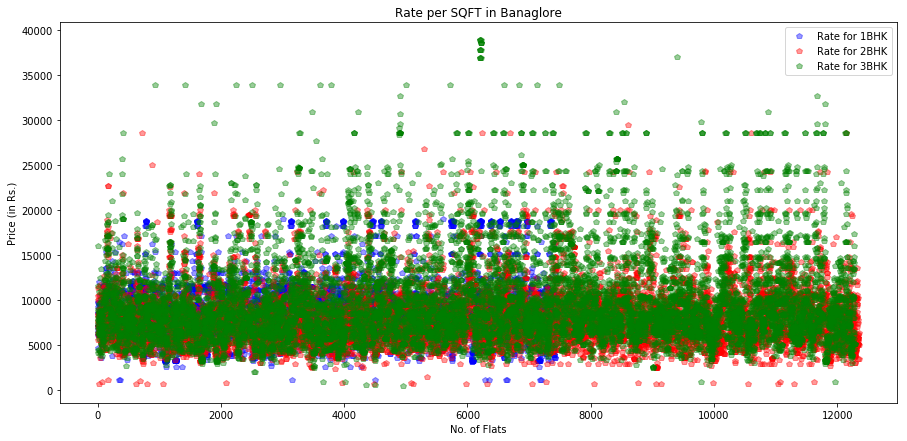

In [458]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, len(rate_1bhk_clean)+1), rate_1bhk_clean, "bp", label="Rate for 1BHK", alpha=0.4)
plt.plot(range(1, len(rate_2bhk_clean)+1), rate_2bhk_clean, "rp", label="Rate for 2BHK", alpha=0.4)
plt.plot(range(1, len(rate_3bhk_clean)+1), rate_3bhk_clean, "gp", label="Rate for 3BHK", alpha=0.4)
plt.xlabel("No. of Flats")
plt.ylabel("Price (in Rs.)")
plt.legend()
plt.title("Rate per SQFT in Banaglore")

In [304]:
au[(au[au["Rate"] > 10000]["Rate"] < 20000) & (au["BHK"] == 1)]["Region"]

28              Whitefield
97           Sarjapur Road
271           Marathahalli
272           Marathahalli
273           Marathahalli
274           Marathahalli
275           Marathahalli
276           Marathahalli
277           Marathahalli
278           Marathahalli
279           Marathahalli
285           Marathahalli
349             HSR Layout
352             HSR Layout
353             HSR Layout
355             HSR Layout
357             HSR Layout
358             HSR Layout
360             HSR Layout
361             HSR Layout
362             HSR Layout
364             HSR Layout
368             HSR Layout
371             HSR Layout
372             HSR Layout
376             HSR Layout
377             HSR Layout
439            Koramangala
440            Koramangala
441            Koramangala
               ...        
31624          CQAL Layout
31625          CQAL Layout
31627          CQAL Layout
31628          CQAL Layout
31691         Shanthi Pura
31781    Lakshmamma Layout
3

In [350]:
#for i in list(np.unique(au[(au["BHK"] == 1) & ((au[au["Rate"] > 2000]["Rate"] < 20000))]["Rate"])):
#    print(au[(au["Rate"] == i) &(au["BHK"] == 1) ])

In [379]:

wf_1bhk_sqft_mean = au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["SQFT"].astype(int).values.mean()
wf_1bhk_sqft_std = au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["SQFT"].astype(int).values.std()

wf_1bhk_rate_mean = au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["Rate"].astype(int).values.mean()
wf_1bhk_rate_std = au[(au["Region"] == "Whitefield")  & (au["BHK"] == 1)]["Rate"].astype(int).values.std()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [399]:
wf_1bhk_rate_mean
au[au["Region"] == "AECS Layout"]["Rate"].astype(int).values.mean()
#wf_1bhk_rate_std

9804.522222222222

In [412]:
region = np.unique(au["Region"])

In [413]:
region_mean = []
region_std = []
region_rate = []
for i in list(region):
    temp = list(au[(au["Region"] == i)][(pd.notna(au["Rate"]))]["Rate"].astype(int).values)
    region_rate.append([x for x in temp if x < 40000])
    region_mean.append(au[(au["Region"] == i) &(au["Rate"] < 40000)][(pd.notna(au["Rate"]))]["Rate"].astype(int).values.mean())
    region_std.append(au[(au["Region"] == i) & (au["Rate"] < 40000)][(pd.notna(au["Rate"]))]["Rate"].astype(int).values.std())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [414]:
#len(region_rate)
region_std[0]

2073.645169065837

In [398]:
au[(au["Region"] == "AECS Layout")][(pd.notna(au["Rate"]))]["Rate"].astype(int).values.mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


9804.522222222222

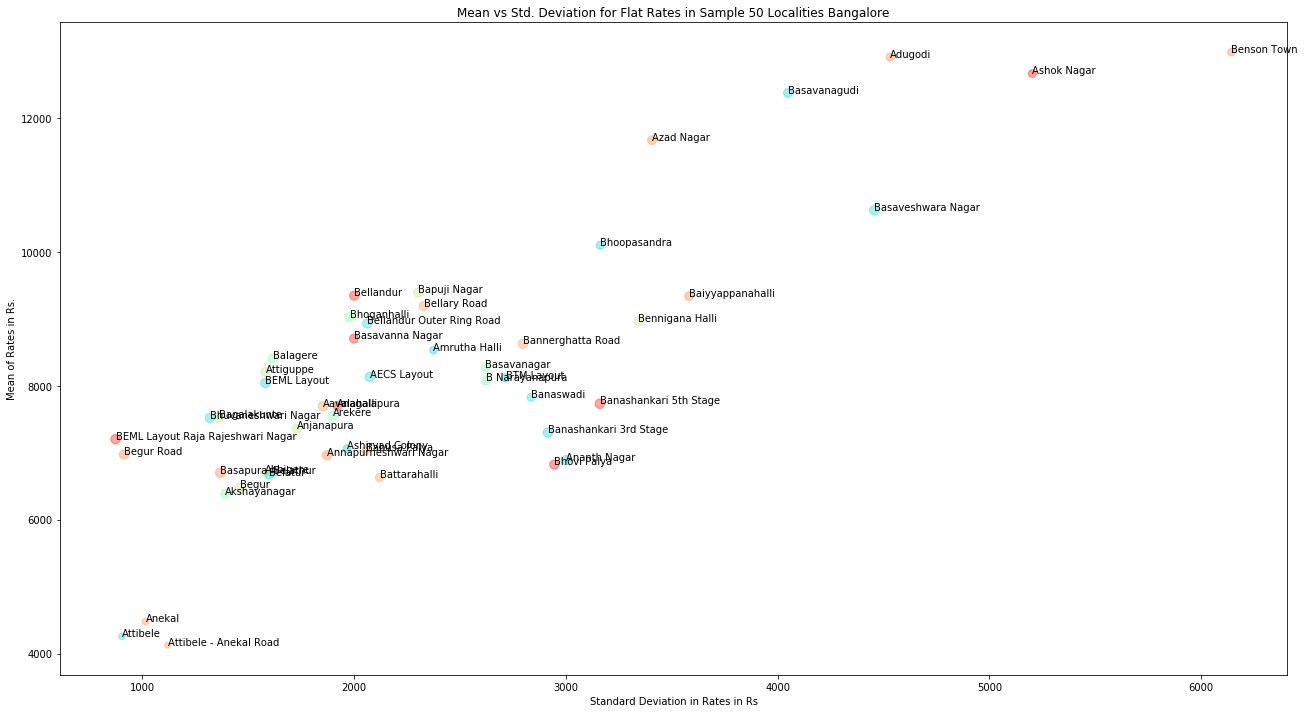

In [488]:
import matplotlib.cm as cm
colors=cm.rainbow(np.random.rand(7))
plt.figure(figsize=(22,12))
plt.scatter(region_std[:50],region_mean[:50],s=[len(x) for x in region_rate[:50]],color=colors, alpha=0.4)
#plt.scatter(region_std[:50],region_mean[:50],s=[len(x) for x in region_rate[:50]],color=colors)
for i in range(0, len(region[:50])):
    plt.annotate(region[i], xy=(region_std[i], region_mean[i]))
plt.xlabel("Standard Deviation in Rates in Rs")
plt.ylabel("Mean of Rates in Rs.")
#plt.figure(figsize=(15, 7))
#plt.plot(range(0, len(region)), region_mean, 'bo')
plt.title("Mean vs Std. Deviation for Flat Rates in Sample 50 Localities Bangalore")
plt.show()

In [480]:
au.Rate.isin(range(500, 40000)).any()

True

In [489]:
del au["Link"]

In [492]:
au.to_csv("/Users/abhijitj/real_estate/bangalore_flats.csv", index=False)